In [1]:
!pip install dice_ml

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 40.0 MB/s eta 0:00:00


In [2]:
!git clone https://github.com/CryAndRRich/trustee.git

Cloning into 'trustee'...
remote: Enumerating objects: 228, done.
remote: Counting objects: 100% (45/45), done.
remote: Compressing objects: 100% (37/37), done.
remote: Total 228 (delta 6), reused 42 (delta 6), pack-reused 183 (from 1)
Receiving objects: 100% (228/228), 95.68 MiB | 17.87 MiB/s, done.
Resolving deltas: 100% (57/57), done.
Updating files: 100% (59/59), done.
Filtering content: 100% (14/14), 726.66 MiB | 127.24 MiB/s, done.


In [3]:
import sys
sys.path.append("/kaggle/working/trustee")

In [4]:
from utils import *
from explainer import *

In [5]:
DATA_ROOT = "/kaggle/input/df2026/DATA_PROCESSED"

TRAIN_FRESH = f"{DATA_ROOT}/train_fresh.csv"
TRAIN_SENIOR = f"{DATA_ROOT}/train_senior.csv"

VAL_FRESH = f"{DATA_ROOT}/val_fresh.csv"
VAL_SENIOR = f"{DATA_ROOT}/val_senior.csv"

In [6]:
WEIGHT_ROOT = "/kaggle/working/trustee/data/weights"
# MODEL_NAME là "Decision_Tree", "Random_Forest", "XGBoost" hoặc "LightGBM"
MODEL_NAME = "LightGBM"
# EXT là "joblib", "json" hoặc "txt"
EXT = "txt"
# APPROACH_TYPE là "Credits", "Gap" hoặc "Ratio"
APPROACH_TYPE = "Credits"

MODEL_FRESH = f"{WEIGHT_ROOT}/{MODEL_NAME.lower()}/{APPROACH_TYPE.lower()}_prediction_{MODEL_NAME.lower()}_fresher.{EXT}"
MODEL_SENIOR = f"{WEIGHT_ROOT}/{MODEL_NAME.lower()}/{APPROACH_TYPE.lower()}_prediction_{MODEL_NAME.lower()}_senior.{EXT}"

In [7]:
feats_senior = [
    "TC_DANGKY", "SEMESTER_INDEX", "SV_NAM_THU",
    
    "LAST_GPA", "LAST_FAIL", "LAST_PASS_RATIO",
    
    "R2_AVG_GPA", "R2_SUM_FAIL", "R2_PASS_RATE",
    "FAIL_TREND_R2", "GPA_TREND_R2",
    
    "R3_AVG_GPA", "R3_SUM_FAIL",
    "PRESSURE_VS_R2", "PRESSURE_VS_R3", "OVERLOAD_R3",
    
    "TOTAL_EARNED", "OVERLOAD_VS_MAX",
    "HIST_AVG_GPA", "HIST_MAX_PASSED", "HIST_MAX_GPA", "HIST_STD_GPA",    
]

feats_fresh = [
    "TC_DANGKY", "SEMESTER_INDEX", "PTXT", "TOHOP_XT",
    
    "DIEM_TRUNGTUYEN", "DIEM_CHUAN", 
    "SCORE_GAP", "ENTRY_RANK", "BENCHMARK_TIER",
    "Z_SCORE", "GAP_RATIO",

    "LAST_GPA", "LAST_FAIL", "LAST_PASS_RATIO",
    "PRESSURE_VS_R2" 
]

Load model: credits_prediction_lightgbm_fresher.txt

=== GLOBAL IMPACT ===


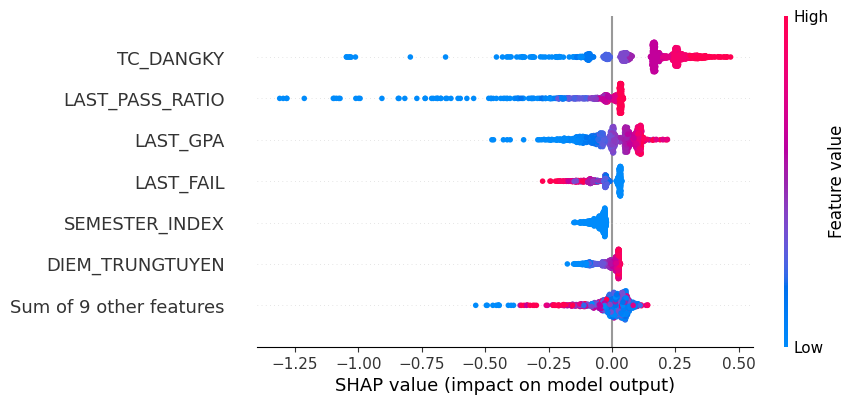


=== REPRESENTATIVE SAMPLES ===

BEST CASE (Min Error) | MSSV: 98b01e77dce1 | True: 21.00 | Pred: 21.00


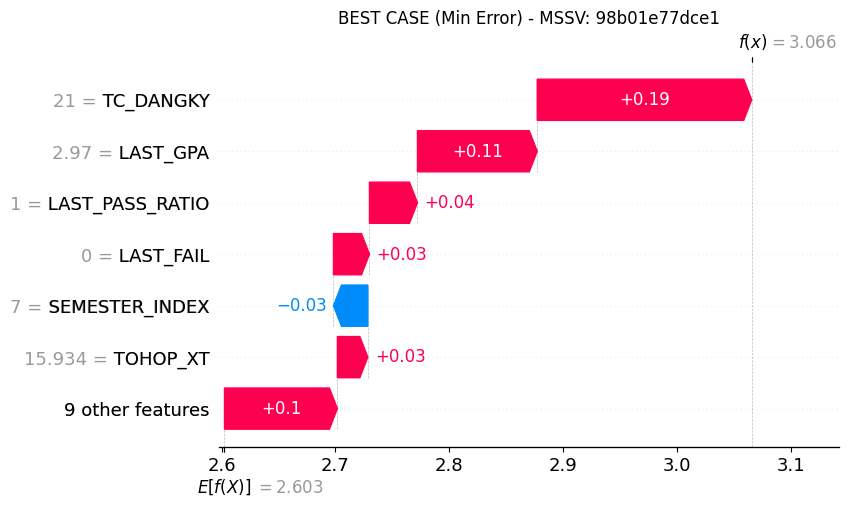


MEDIAN CASE (Avg Error) | MSSV: da431f8240ea | True: 17.00 | Pred: 19.17


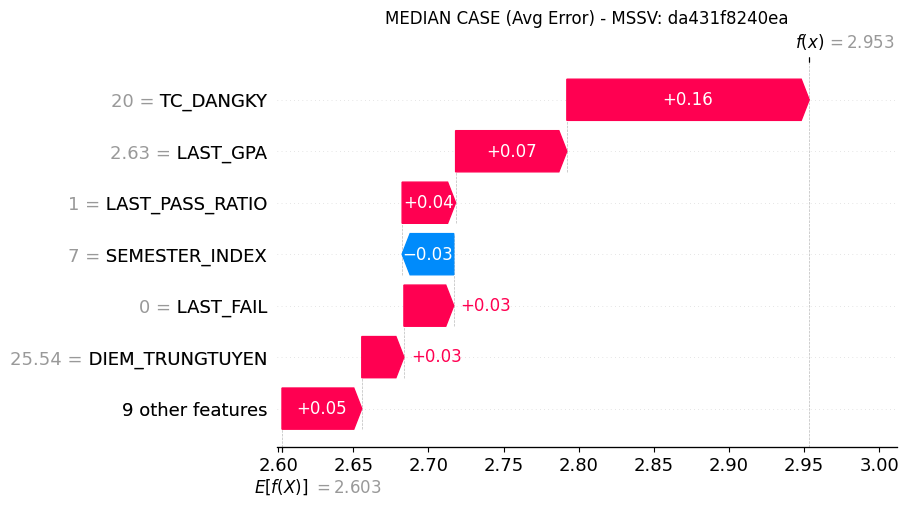


WORST CASE (Max Error) | MSSV: 88e963c787f7 | True: 0.00 | Pred: 18.01


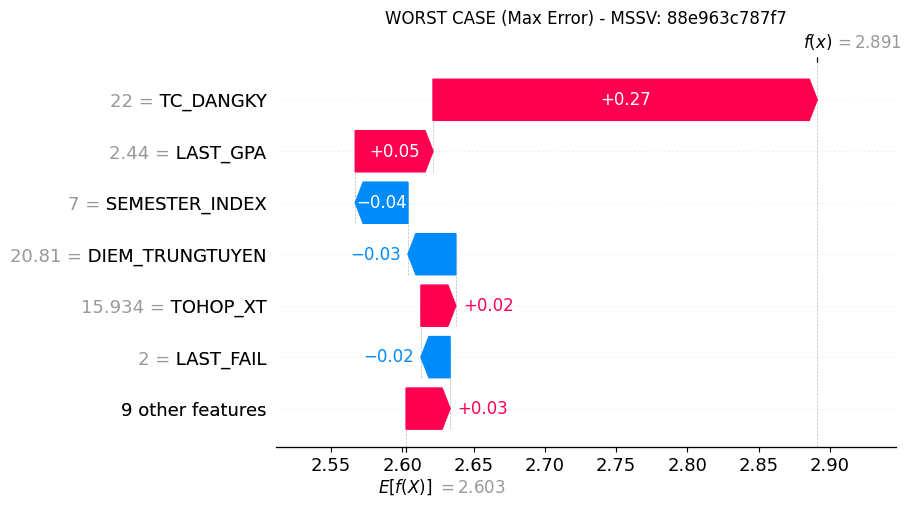


=== CONTRASTIVE ANALYSIS ===


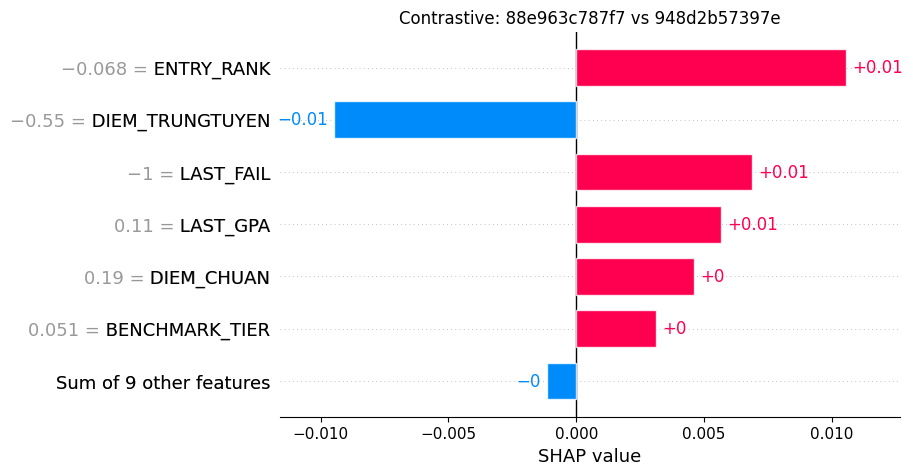

In [8]:
df_res_fresh, exp_fresh = explain_model_shap(
    model_path=MODEL_FRESH, 
    data_path=VAL_FRESH, 
    feats=feats_fresh,
    approach_type=APPROACH_TYPE
)

Load model: credits_prediction_lightgbm_senior.txt

=== GLOBAL IMPACT ===


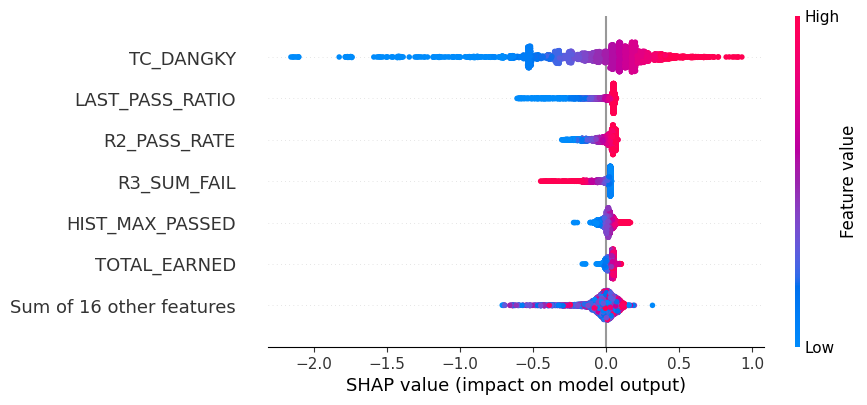


=== REPRESENTATIVE SAMPLES ===

BEST CASE (Min Error) | MSSV: e80129087d05 | True: 12.00 | Pred: 12.00


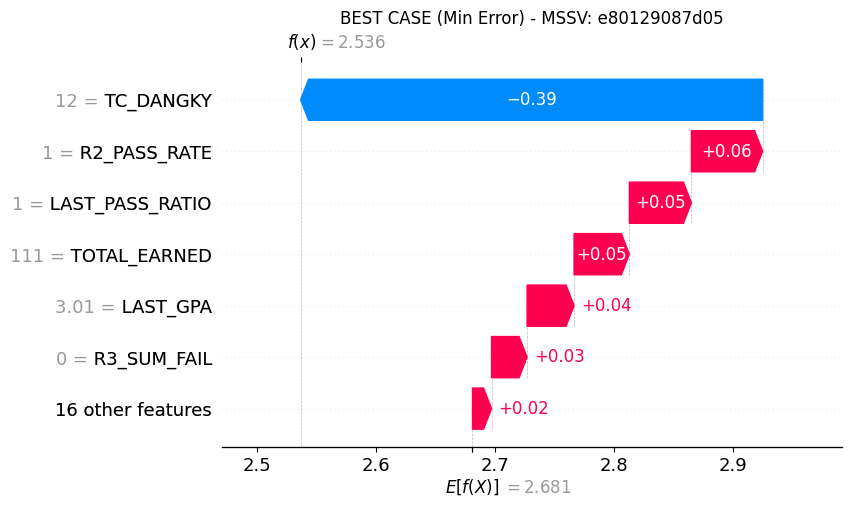


MEDIAN CASE (Avg Error) | MSSV: d5e395b831b3 | True: 17.00 | Pred: 15.42


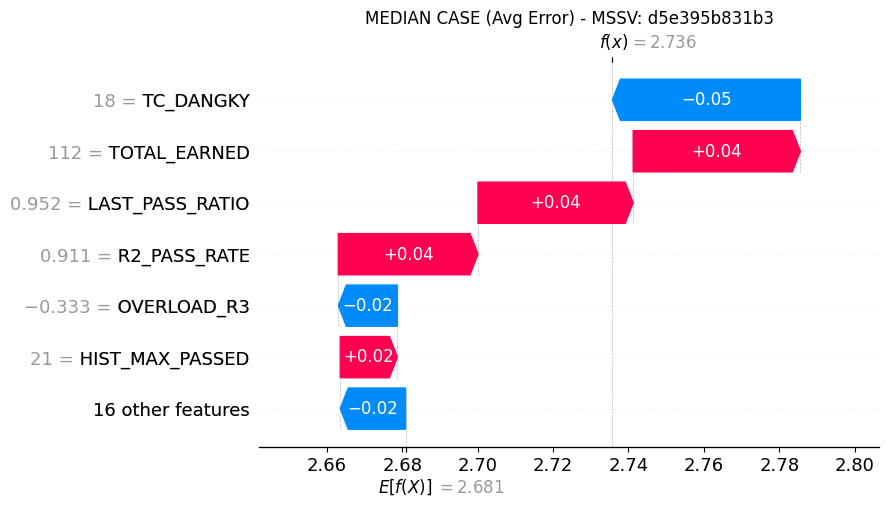


WORST CASE (Max Error) | MSSV: a70a3479f529 | True: 2.00 | Pred: 38.34


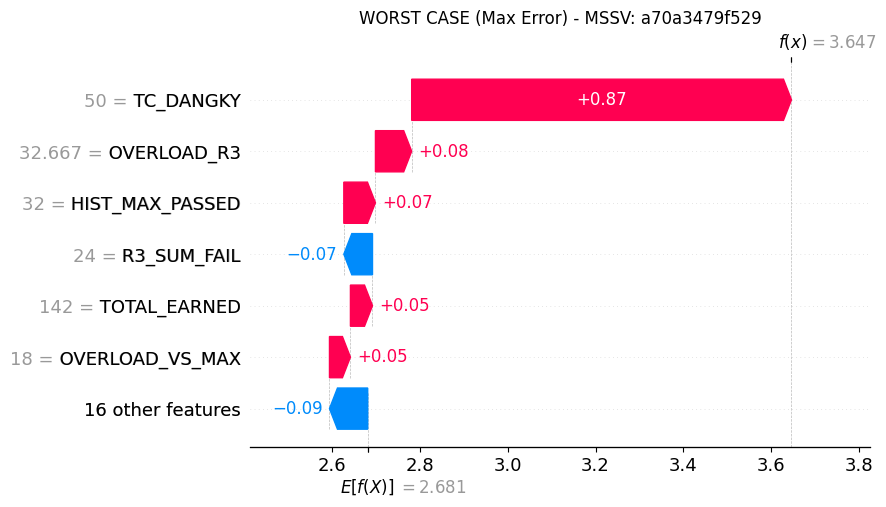


=== CONTRASTIVE ANALYSIS ===


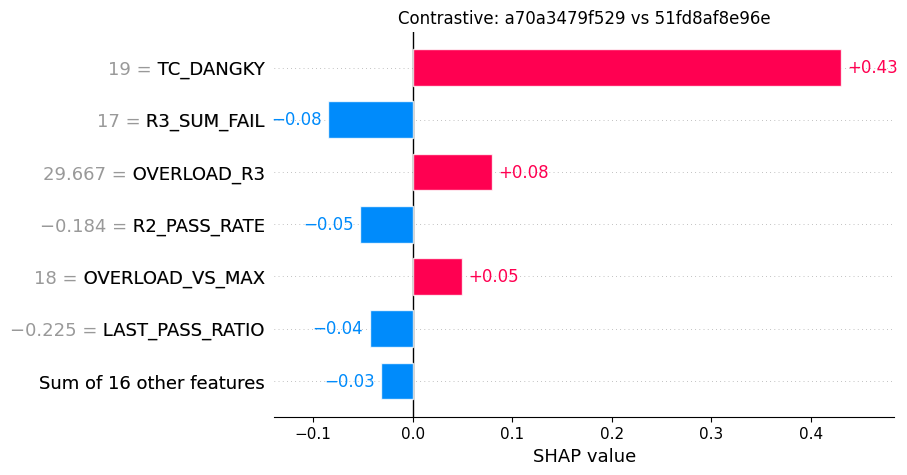

In [9]:
df_res_senior, exp_senior = explain_model_shap(
    model_path=MODEL_SENIOR, 
    data_path=VAL_SENIOR, 
    feats=feats_senior,
    approach_type=APPROACH_TYPE
)

Load model: credits_prediction_lightgbm_fresher.txt

=== LIME LOCAL EXPLANATIONS ===

BEST CASE (Min Error) | MSSV: 98b01e77dce1 | Error: 0.0000


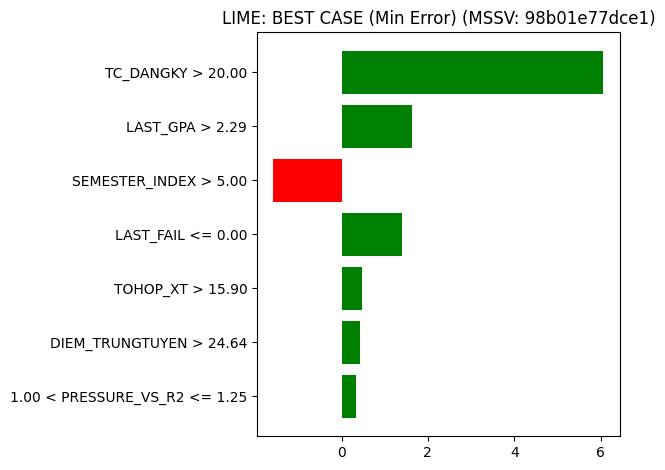


MEDIAN CASE (Avg Error) | MSSV: da431f8240ea | Error: 2.1703


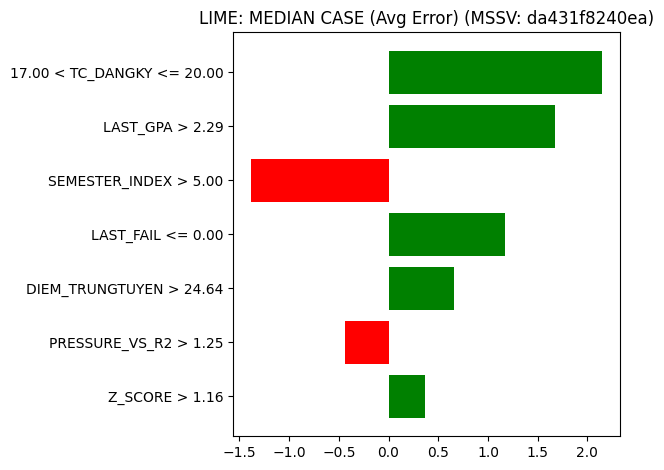


WORST CASE (Max Error) | MSSV: 88e963c787f7 | Error: 18.0133


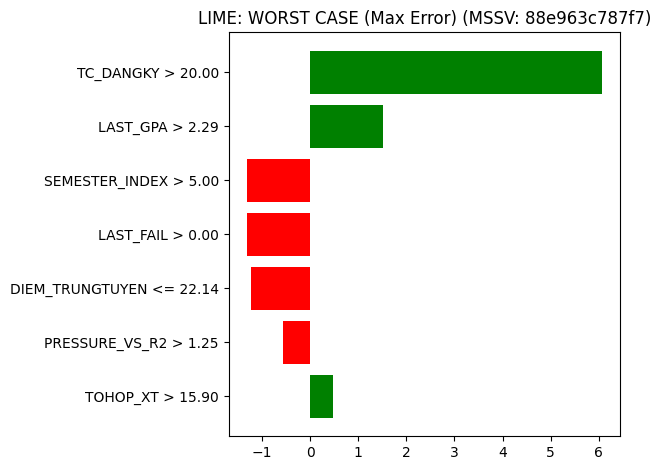

In [10]:
errors_fresh = explain_model_lime(
    model_path=MODEL_FRESH, 
    train_path=TRAIN_FRESH,
    val_path=VAL_FRESH, 
    feats=feats_fresh,
    approach_type=APPROACH_TYPE
)

Load model: credits_prediction_lightgbm_senior.txt

=== LIME LOCAL EXPLANATIONS ===

BEST CASE (Min Error) | MSSV: e80129087d05 | Error: 0.0000


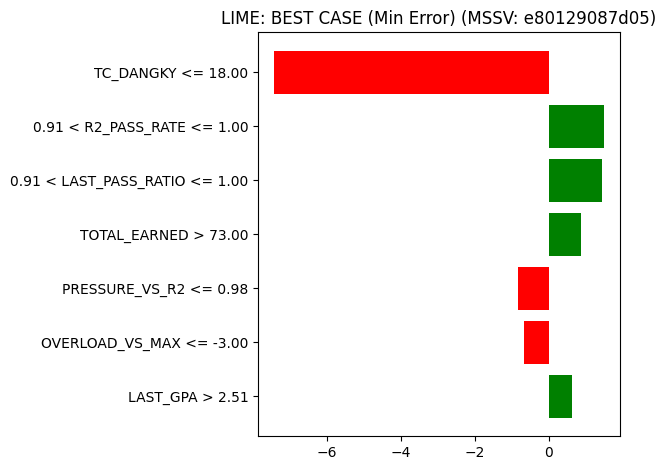


MEDIAN CASE (Avg Error) | MSSV: d5e395b831b3 | Error: 1.5788


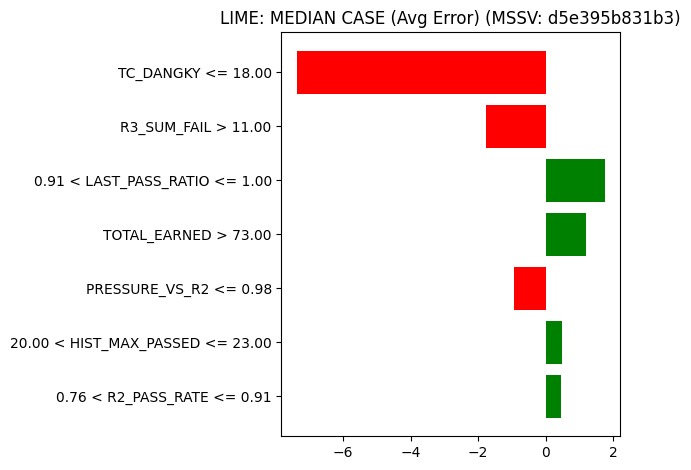


WORST CASE (Max Error) | MSSV: a70a3479f529 | Error: 36.3421


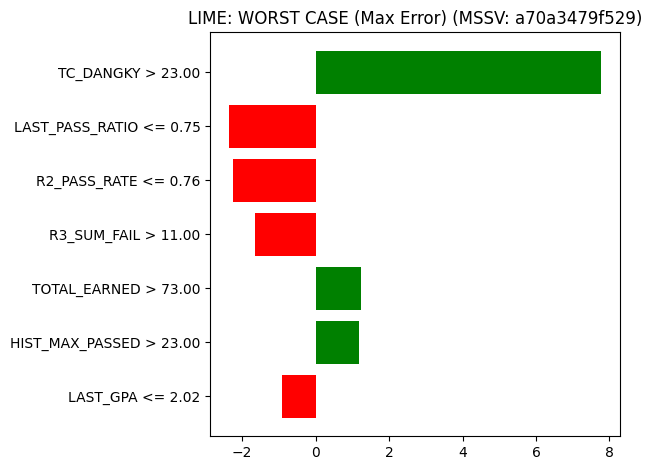

In [11]:
errors_senior = explain_model_lime(
    model_path=MODEL_SENIOR, 
    train_path=TRAIN_SENIOR,
    val_path=VAL_SENIOR, 
    feats=feats_senior,
    approach_type=APPROACH_TYPE
)

In [12]:
dice_exp_senior = explain_model_dice(
    model_path=MODEL_SENIOR, 
    train_path=TRAIN_SENIOR,
    val_path=VAL_SENIOR, 
    feats=feats_senior,
    approach_type=APPROACH_TYPE
)

Load model: credits_prediction_lightgbm_senior.txt

=== DICE COUNTERFACTUAL EXPLANATION ===
Tư vấn cho MSSV: bc6bd14ea87e | Dự báo hiện tại: 0.4846


100%|██████████| 1/1 [00:00<00:00,  1.20it/s]

Query instance (original outcome : 0.0)


,TC_DANGKY,SEMESTER_INDEX,SV_NAM_THU,LAST_GPA,LAST_FAIL,LAST_PASS_RATIO,R2_AVG_GPA,R2_SUM_FAIL,R2_PASS_RATE,FAIL_TREND_R2,...,PRESSURE_VS_R2,PRESSURE_VS_R3,OVERLOAD_R3,TOTAL_EARNED,OVERLOAD_VS_MAX,HIST_AVG_GPA,HIST_MAX_PASSED,HIST_MAX_GPA,HIST_STD_GPA,TC_HOANTHANH
0,1.0,7,6,1.81,4.0,0.2,1.83,14.0,0.461538,-3.0,...,0.166667,0.096774,-9.333333,100.0,-18.0,1.8,19.0,1.85,0.047958,0.0



Diverse Counterfactual set (new outcome: [0.8, 1.0])


,TC_DANGKY,SEMESTER_INDEX,SV_NAM_THU,LAST_GPA,LAST_FAIL,LAST_PASS_RATIO,R2_AVG_GPA,R2_SUM_FAIL,R2_PASS_RATE,FAIL_TREND_R2,...,PRESSURE_VS_R2,PRESSURE_VS_R3,OVERLOAD_R3,TOTAL_EARNED,OVERLOAD_VS_MAX,HIST_AVG_GPA,HIST_MAX_PASSED,HIST_MAX_GPA,HIST_STD_GPA,TC_HOANTHANH
0,-,-,-,-,-,-,-,-,1.1,-,...,38.8,-,-,-,-,-,-,-,-,0.9497396945953369
1,-,-,-,-,-,-,-,-,0.9,-,...,-,-,-,-,-,-,30.3,-,-,0.8791983127593994
2,-,-,-,-,-,0.9,-,-,1.0,-,...,-,-,-,-,-,-,-,-,-,0.9239112138748169
3,-,-,-,-,-,-,-,-,1.1,-,...,-,-,-,-,-,-,58.2,-,-,0.9549561738967896
4,-,-,-,-,-,1.0,-,-,-,-,...,-,-,-,-,49.6,-,-,-,-,0.8198350667953491
